<h1>Thesina for Mathematics in Machine Learning</h1> </br>
<h3>Student: Ali Ghasemi <br>
<h3>Student ID: s289223 <br>
<h3>Dataset: Higher Education Students Performance Evaluation Dataset Data Set </h3>

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

First we have to import the dataset and perform preprocessing and analyze the dataset </br>
We have to deal with the missing data, outliers and also perfome normalization on our data


In [13]:
os.getcwd()

'C:\\Users\\aligh\\Math4Ml'

The dataset is called <b>Higher Education Students Performance Evaluation Dataset Data Set<b>

In [31]:
ds=pd.read_csv('DATA.csv',header=None,sep=";") #adding the dataset 
#the initial shape of the dataset is (145,1) but we need to seperate the attributes so I used "," as the seperator
ds.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31','32', 'Class']


In [32]:
ds.describe()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,1.616438,1.602740,1.952055,3.575342,1.684932,1.630137,1.616438,1.671233,1.671233,1.787671,...,1.342466,1.383562,1.486301,1.321918,2.698630,2.219178,2.561644,1.986301,3.301370,2.910959
std,0.613191,0.491015,0.542436,0.803747,0.547766,0.610412,0.667060,1.145363,1.221133,1.038626,...,1.739752,1.770487,1.894589,1.933141,1.941808,2.092658,2.123668,2.313339,2.503432,2.435148
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,3.000000,2.750000,4.000000,3.000000
max,3.000000,2.000000,3.000000,5.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000


In [33]:
ds.head(5)

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,Class
0,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
1,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
2,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
3,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
4,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1


Each of these numbers in columns represent an attribute </br>
check the link below:</br>
http://archive.ics.uci.edu/ml/datasets/Higher+Education+Students+Performance+Evaluation+Dataset

<b>Attribute Information</b>:</br>

Student ID</br>
1- Student Age (1: 18-21, 2: 22-25, 3: above 26)</br>
2- Sex (1: female, 2: male)</br>
3- Graduated high-school type: (1: private, 2: state, 3: other)</br>
4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)</br>
5- Additional work: (1: Yes, 2: No)</br>
6- Regular artistic or sports activity: (1: Yes, 2: No)</br>
7- Do you have a partner: (1: Yes, 2: No)</br>
8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)</br>
9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)</br>
10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)</br>
11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)</br>
12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)</br>
13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)</br>
14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)</br>
15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)</br>
16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)</br>
17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)</br>
18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)</br>
19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)</br>
20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)</br>
21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)</br>
22- Attendance to classes (1: always, 2: sometimes, 3: never)</br>
23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)</br>
24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)</br>
25- Taking notes in classes: (1: never, 2: sometimes, 3: always)</br>
26- Listening in classes: (1: never, 2: sometimes, 3: always)</br>
27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)</br>
28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)</br>
29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)</br>
30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)</br>
31- Course ID</br>
32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)</br>

<H3>First we have to clean the data</H3>
<br>


we take care of the NA and missing files

In [16]:
type(ds)

pandas.core.frame.DataFrame

In [17]:
ds.shape

(146, 33)

In [18]:
ds.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
           dtype='int64')

In [19]:
ds.dropna()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
1,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
2,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
3,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
4,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
142,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
143,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
144,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [20]:
ds=ds.dropna() 

In [21]:
ds.isna().sum().sum()#the new dataset does not contain NA values

0

<H3>Correlation map </H3> </br>
we need this to understand the relationship between the different variables with eachother 

In [50]:
ds.corr().style.background_gradient().set_precision(1)
#a precision of 1 is ok to have a good figure

C:\Users\aligh\AppData\Local\Temp/ipykernel_16420/1000042695.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  ds.corr().style.background_gradient().set_precision(1)


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
2,1.0,0.1,0.3,-0.3,-0.2,0.1,-0.0,0.1,-0.0,-0.2,-0.1,-0.1,0.0,-0.0,-0.2,-0.2,-0.2,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,-0.1,0.0,0.0,-0.0
3,0.1,1.0,0.1,-0.2,0.2,0.2,-0.0,0.0,0.0,-0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.1,-0.0,0.0,0.0,0.1,0.1,0.1,0.0,0.1,0.1,0.2,0.2
4,0.3,0.1,1.0,-0.1,-0.1,0.2,0.1,-0.0,0.1,0.1,-0.1,-0.0,0.1,0.2,0.1,0.0,0.0,0.1,0.2,0.2,0.2,0.1,0.1,0.1,0.2,0.2,0.1,0.2,0.1,0.2
5,-0.3,-0.2,-0.1,1.0,0.1,-0.1,0.1,-0.1,0.0,0.1,-0.1,-0.2,-0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.0,0.1,0.0,0.1,0.0,0.1,0.0,0.2,0.1
6,-0.2,0.2,-0.1,0.1,1.0,0.5,0.4,0.1,0.3,0.2,0.4,0.4,0.2,0.4,0.4,0.3,0.3,0.4,0.4,0.5,0.4,0.5,0.4,0.4,0.5,0.4,0.5,0.5,0.4,0.5
7,0.1,0.2,0.2,-0.1,0.5,1.0,0.4,0.3,0.3,0.3,0.2,0.3,0.4,0.5,0.4,0.4,0.4,0.5,0.5,0.6,0.6,0.6,0.5,0.6,0.6,0.6,0.6,0.6,0.5,0.5
8,-0.0,-0.0,0.1,0.1,0.4,0.4,1.0,0.3,0.4,0.3,0.3,0.4,0.4,0.6,0.4,0.3,0.6,0.6,0.6,0.7,0.6,0.7,0.6,0.7,0.6,0.6,0.6,0.6,0.6,0.6
9,0.1,0.0,-0.0,-0.1,0.1,0.3,0.3,1.0,0.2,0.3,0.3,0.3,0.2,0.5,0.4,0.2,0.3,0.4,0.4,0.4,0.5,0.5,0.5,0.5,0.4,0.4,0.4,0.4,0.3,0.4
10,-0.0,0.0,0.1,0.0,0.3,0.3,0.4,0.2,1.0,0.5,0.4,0.3,0.1,0.4,0.5,0.2,0.4,0.4,0.4,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.4,0.4,0.5
11,-0.2,-0.1,0.1,0.1,0.2,0.3,0.3,0.3,0.5,1.0,0.4,0.5,0.2,0.6,0.7,0.4,0.5,0.6,0.6,0.7,0.6,0.6,0.7,0.6,0.6,0.7,0.6,0.6,0.5,0.6


creating the corelation map using another visualization library (seaborn)

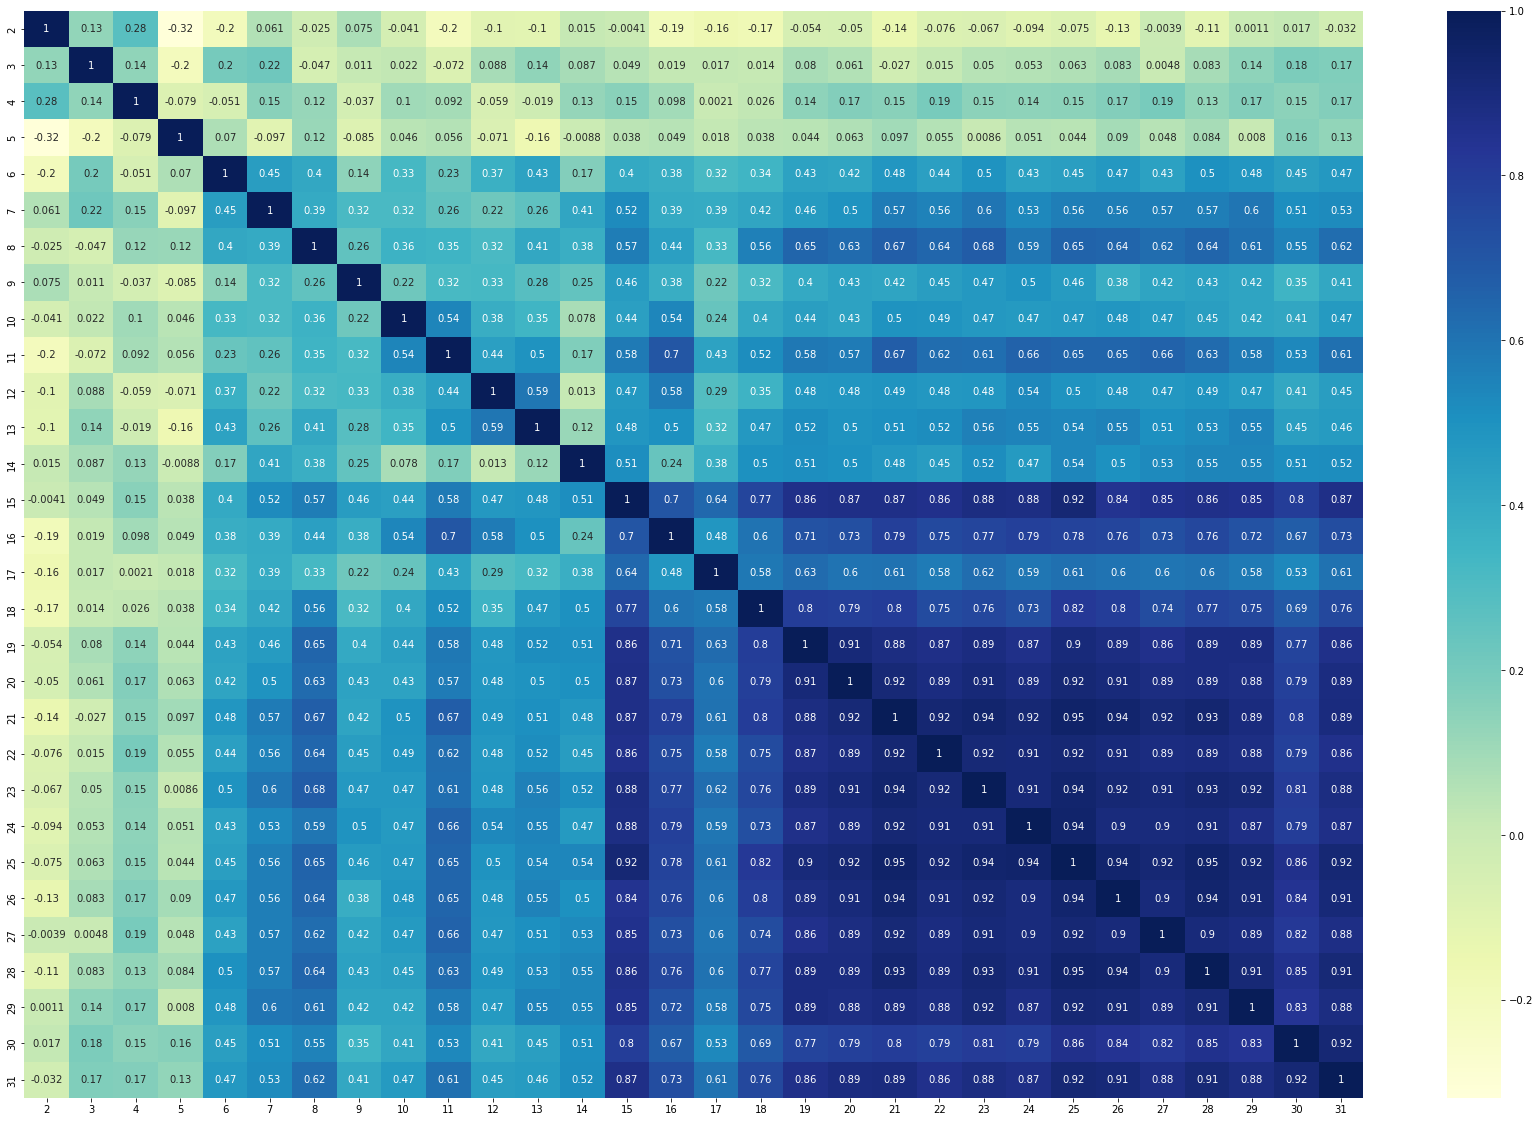

In [53]:
corr = ds.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap="YlGnBu",annot=True)
plt.show()